<a href="https://www.kaggle.com/code/naiku007/ai-trainings-dtici23?scriptVersionId=128232326" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Load Libraries


In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        

/kaggle/input/playground-series-s3e12/sample_submission.csv
/kaggle/input/playground-series-s3e12/train.csv
/kaggle/input/playground-series-s3e12/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:

from sklearn.model_selection import *

from sklearn.datasets import *


# Data 

In [3]:
# checks = pd.read_csv('https://git.t3.daimlertruck.com/raw/indhrna/Trainings/main/airline_passengers.csv?token=GHSAT0AAAAAAAAAINW6CBFLFADUWC4MCFYCZC3CWLQ')
# check1 = pd.read_csv('https://git.t3.daimlertruck.com/raw/indhrna/Trainings/blob/main/airline_passengers.csv')
# checks.head()

# check1

# Global Variables

In [4]:
RANDOM_VALUE = 143 ## random variable to be set to a fixed value - to regenerate the same results


# Models

### base models

In [5]:
# mnist = fetch_openml('mnist_784',version=1)
# mnist.keys()

## Boston Housing dataset - Price Prediction

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


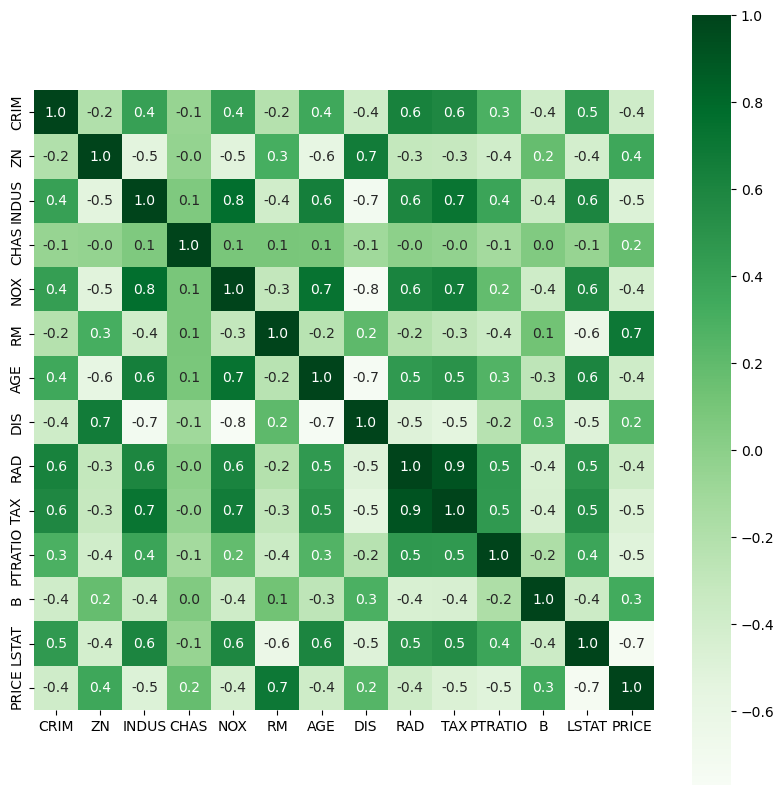

In [6]:


# Importing the Boston Housing dataset
boston = load_boston()


# Initializing the dataframe
data = pd.DataFrame(boston.data)


#Adding the feature names to the dataframe
data.columns = boston.feature_names


#Adding target variable to dataframe
data['PRICE'] = boston.target 

# Finding out the correlation between the features
corr = data.corr()

# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

# Spliting target variable and independent variables
X = data.drop(['PRICE'], axis = 1)
y = data['PRICE']


# Splitting to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = RANDOM_VALUE)

data.head()

In [7]:
 print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

R^2: 0.7664873559009413
Adjusted R^2: 0.7575589312736244
MAE: 2.918455504316754
MSE: 17.783617420404788
RMSE: 4.2170626531277415


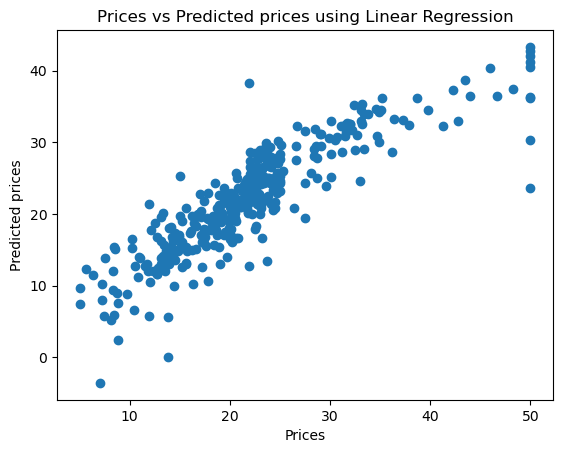

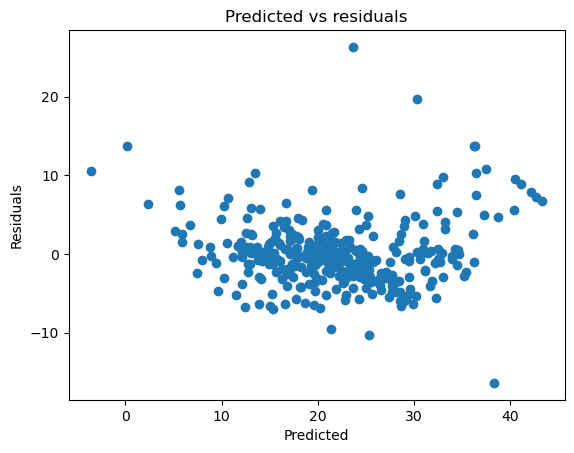

In [8]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)

# Model prediction on train data
y_pred = lm.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices using Linear Regression")
plt.show()

# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

## Decision Trees

## DT Regression - Boston house price prediction

In [9]:

from sklearn import tree

In [10]:

## Fitting data to the Model
dt_regr = tree.DecisionTreeRegressor(criterion='squared_error')
dt_regr.fit(X_train, y_train)

# Model prediction on train data
y_pred = dt_regr.predict(X_train)

# tree.plot_tree(dt_regr)

R^2: 1.0
Adjusted R^2: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0


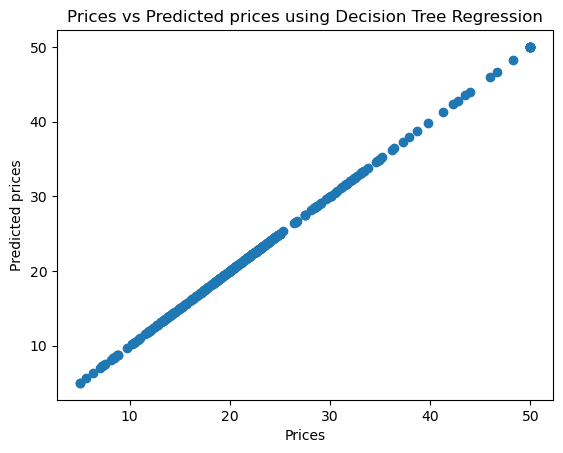

In [11]:
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))


# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices using Decision Tree Regression")
plt.show()

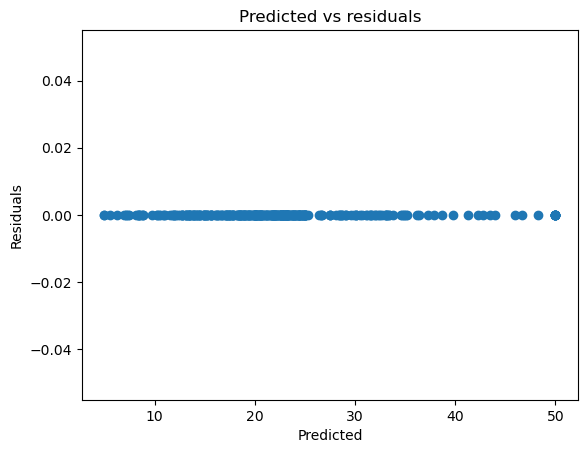

In [12]:
# Checking residuals
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Fitting 3 folds for each of 50 candidates, totalling 150 fits
R^2: 1.0
Adjusted R^2: 1.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0


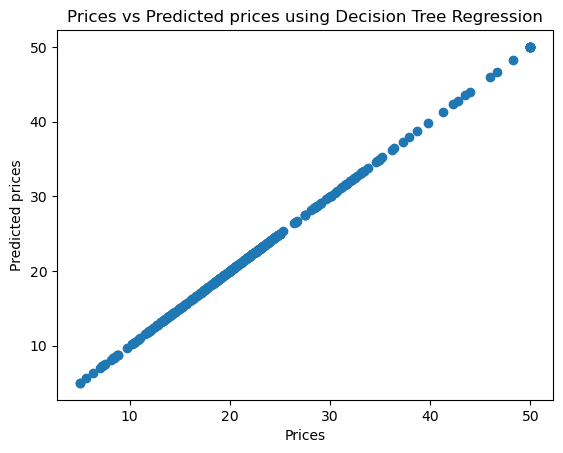

In [13]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["squared_error", "absolute_error"]
}
grid_search = GridSearchCV(estimator=dt_regr,
                           param_grid=params,
                           scoring='neg_mean_squared_error',n_jobs=-1, verbose=1, cv=3)

grid_search.fit(X_train,y_train)

# Model prediction on train data
y_pred = dt_regr.predict(X_train)

# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

import matplotlib.pyplot as plt
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices using Decision Tree Regression")
plt.show()

## Classifier

[Text(0.4, 0.8333333333333334, 'X[1] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

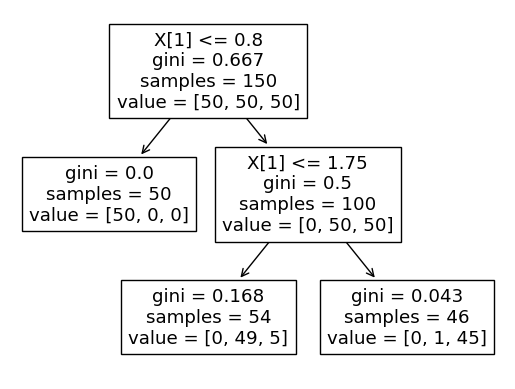

In [14]:
from sklearn.tree import DecisionTreeClassifier
iris = load_iris()
X = iris.data[:,2:]
Y = iris.target

tree_clfr = DecisionTreeClassifier(max_depth=2) # reducing the overfitting
tree_clfr.fit(X,Y)

tree.plot_tree(tree_clfr)

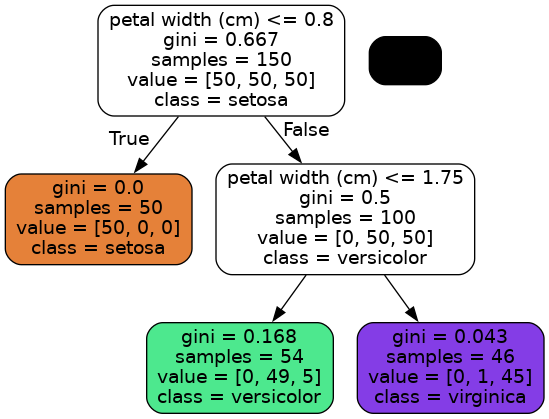

In [15]:
from sklearn.tree import export_graphviz
from IPython.display import Image, display
import pydot
from skimage import io

dotfile = open("./dtree2.dot", 'w')
export_graphviz(tree_clfr, out_file = 'dtree2.dot',
                feature_names = iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True
)

dotfile.close()


(graph,) = pydot.graph_from_dot_file('dtree2.dot')


plt = Image(graph.create_png())
display(plt)

graph.write_png('trees_clfr.png')

  

# Ensemble
## Voting

In [16]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X, Y = make_moons()


log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
svc_clf = SVC()

voting_clf = VotingClassifier(estimators=[('log',log_clf),('rf',rf_clf),('svc',svc_clf)],
                             voting='hard')
voting_clf.fit(X,Y)


xtrain,xtest,ytrain,ytest = train_test_split(X,Y)
for clfr in (log_clf,rf_clf,svc_clf,voting_clf):
    clfr.fit(xtrain,ytrain)
    y_pred = clfr.predict(xtest)
    print(clfr.__class__.__name__, accuracy_score(ytest, y_pred))

LogisticRegression 0.8
RandomForestClassifier 1.0
SVC 1.0
VotingClassifier 1.0


In [17]:
import sklearn 
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei